In [1]:
import time

import tensorflow as tf
import numpy as np

from preprocess import Preprocessing, PATH
from evaluation import get_results, get_cross_validation_scores_keras

/Users/torokpeter/Documents/tuw/first/machine_learning/machinelearning-tuw/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training MLP...
Epoch 1/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3814 - loss: 1.0749 - val_accuracy: 0.6282 - val_loss: 0.8874
Epoch 2/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5771 - loss: 0.8725 - val_accuracy: 0.7436 - val_loss: 0.7418
Epoch 3/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6657 - loss: 0.7417 - val_accuracy: 0.7821 - val_loss: 0.6238
Epoch 4/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6743 - loss: 0.6631 - val_accuracy: 0.7821 - val_loss: 0.5414
Epoch 5/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7286 - loss: 0.5855 - val_accuracy: 0.7692 - val_loss: 0.4824
Epoch 6/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7686 - loss: 0.5167 - val_accuracy: 0.8462 - val_loss: 0.4314
Epoch 7/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8043 - loss: 0.4511 - val_accuracy: 0.8462 - val_loss: 0.3935
Epoch 8/30
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8271 - loss: 0.4061 - val_accuracy: 0.

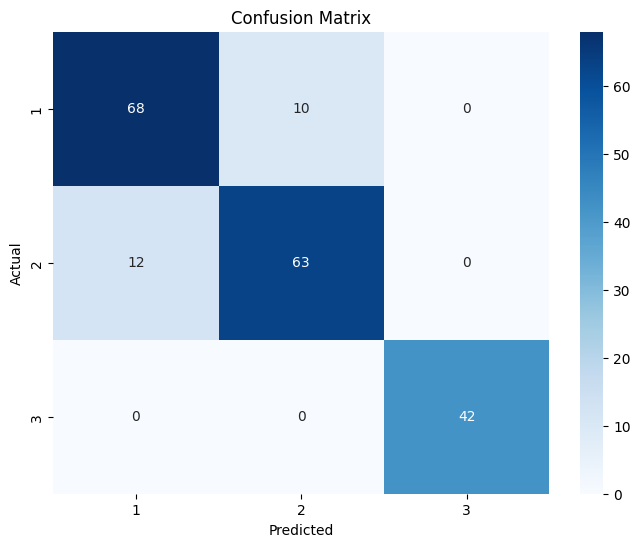

In [2]:
def build_neural_net(input_shape, num_classes):
    """
    Builds a keras MLP with dropout
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Input(shape=(input_shape,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(num_classes, activation='softmax') 
    ])
    
    # We use 'sparse_categorical_crossentropy' because our y labels are integers (1, 2, 3)
    # not one-hot encoded vectors.
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

def neural_net_pipeline():
    """
    Runs neural net pipeline

    Loads data, builds and trains MLP, tests metrics
    """
    pp = Preprocessing()
    X_train, X_test, y_train, y_test = pp.pipeline(PATH, split=True, scale=True, encode_labels=True)
    
    nn_model = build_neural_net(input_shape=X_train.shape[1], num_classes=len(pp.labels))
    
    print("Training MLP...")
    t0 = time.time()
    nn_model.fit(
        X_train,
        y_train,
        epochs=30,
        batch_size=32,
        validation_split=0.1,
        verbose=1
    )
    t1 = time.time()
    print(f'The model fit took {t1-t0:.4f} seconds')
    y_prob_nn = nn_model.predict(X_test)
    y_pred_nn = np.argmax(y_prob_nn, axis=1)
    get_cross_validation_scores_keras(
        build_neural_net, 
        X_train, 
        y_train, 
        input_shape=X_train.shape[1], 
        num_classes=len(pp.labels),
        cv=10
    )
    get_results(y_test, y_pred_nn, pp.labels)

neural_net_pipeline()